# Donut Merchant Analysis with web scraping data

In this project, we delve into the realm of donut stores, combining the power of web scraping and interactive visualization with Plotly Dash. Our goal is to gather valuable insights from various donut stores by scraping data from their websites. By harnessing the capabilities of web scraping, we extract information such as donut flavors and prices. Armed with this rich dataset, we employ Plotly Dash, a powerful Python library for building interactive dashboards, to perform comprehensive analysis and present our findings in visually captivating and user-friendly visualizations. Join us on this journey as we unravel the delicious secrets hidden within the world of donuts and uncover trends, patterns, and preferences through the art of data analysis and Plotly Dash.

## Import used libary

In [71]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import time
from datetime import datetime

## URL use for scraping
GrabFood is a food delivery service that operates in several countries in Southeast Asia. It allows users to order food from a wide range of restaurants and have it delivered to their location.

Note this url for Grab website need to change every.

In [72]:
url_list =['https://food.grab.com/th/en/restaurant/dunkin-%E0%B8%94%E0%B8%B1%E0%B8%87%E0%B8%81%E0%B8%B4%E0%B9%89%E0%B8%99-%E0%B9%80%E0%B8%A1%E0%B9%80%E0%B8%88%E0%B8%AD%E0%B8%A3%E0%B9%8C-%E0%B8%8B%E0%B8%B5%E0%B8%99%E0%B8%B5%E0%B9%80%E0%B8%9E%E0%B8%A5%E0%B9%87%E0%B8%81%E0%B8%8B%E0%B9%8C-%E0%B8%9B%E0%B8%B4%E0%B9%88%E0%B8%99%E0%B9%80%E0%B8%81%E0%B8%A5%E0%B9%89%E0%B8%B2-delivery/3-CYWYVBLTARMXTT?',
           'https://food.grab.com/th/en/restaurant/mister-donut-%E0%B8%A1%E0%B8%B4%E0%B8%AA%E0%B9%80%E0%B8%95%E0%B8%AD%E0%B8%A3%E0%B9%8C-%E0%B9%82%E0%B8%94%E0%B8%99%E0%B8%B1%E0%B8%97-%E0%B9%80%E0%B8%97%E0%B8%AA%E0%B9%82%E0%B8%81%E0%B9%89-%E0%B9%82%E0%B8%A5%E0%B8%95%E0%B8%B1%E0%B8%AA-%E0%B8%9E%E0%B8%A3%E0%B8%B0%E0%B8%A3%E0%B8%B2%E0%B8%A1-1-delivery/3-CY4XFEKJGVC2GA?',
           'https://food.grab.com/th/en/restaurant/krispy-kreme-%E0%B8%84%E0%B8%A3%E0%B8%B4%E0%B8%AA%E0%B8%9B%E0%B8%B5%E0%B9%89%E0%B8%84%E0%B8%A3%E0%B8%B5%E0%B8%A1-%E0%B9%81%E0%B8%AD%E0%B8%A1-%E0%B9%84%E0%B8%8A%E0%B8%99%E0%B9%88%E0%B8%B2%E0%B8%97%E0%B8%B2%E0%B8%A7%E0%B8%99%E0%B9%8C-delivery/3-CZABCVJKN6UYNT?']

In [73]:
headers = {'a-im': 'gzip',
 'sec-fetch-site': 'none',
 'sec-fetch-mode': 'no-cors',
 'sec-fetch-dest': 'empty',
 'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36',
 'accept-encoding': 'gzip, deflate, br'}

## Scraping part

In [74]:
def scrape():
    try:
        df = pd.read_csv('./data.csv')
    except:
        df = pd.DataFrame()

    temp_df = pd.DataFrame()
    store =  []
    item_name = []
    item_price = []
    item_des = []
    item_cat = []
    for url in url_list:
        r = requests.get(url,headers=headers)
        print(r.status_code)
        soup = bs(r.text,"html.parser")
        item = soup.find_all('div','menuItemWrapper___bQmSP ant-col-md-24 ant-col-lg-8')

        for j in  soup.find_all('div','category___3C8lX'):
            for i in j.find_all('div','menuItemWrapper___bQmSP ant-col-md-24 ant-col-lg-8'):


                store.append(soup.find('div','breadcrumb___5JopJ ant-breadcrumb').text.replace('HomeRestaurant',''))
                item_name.append(i.find('div','ant-row-flex itemName___UD_E_').text)
                item_price.append(i.find('div','ant-row itemPrice___DqSxA').text)
                item_cat.append(j.find('h2','categoryName___szaKI').text)
                try:
                    item_des.append(i.find('div','itemNameDescription___38JZv').find('p','itemDescription___2cIzt').text)
                except:
                    item_des.append(None)

        time.sleep(3)

    temp_df['item_name'] = item_name
    temp_df['item_price'] = item_price
    temp_df['store'] = store
    temp_df['date'] = datetime.now().strftime('%Y-%m-%d %H:%M')
    temp_df['item_des'] = item_des
    temp_df['item_cat'] = item_cat
    try:
        df = pd.concat([df,temp_df])
        df.to_csv('./data.csv',index=False)
    except:
        temp_df.to_csv('./data.csv',index=False,encoding='utf-8-sig')
        df = temp_df
        
        
    df = pd.read_csv('data.csv')
    df['item_cat'] = df['item_cat'].str.lower()
    df.loc[df['item_cat'].str.contains('donut'),'item_cat'] = 'Donut'
    df.loc[df['item_cat'].str.contains('dough'),'item_cat'] = 'Donut'
    df.loc[df['item_cat'].str.contains('pon de ring'),'item_cat'] = 'Donut'
    df.loc[df['item_cat'].str.contains('choco'),'item_cat'] = 'Donut'
    df.loc[df['item_cat'].str.contains('offer'),'item_cat'] = 'Promotion'
    df.loc[df['item_cat'].str.contains('set'),'item_cat'] = 'Promotion'
    df.loc[df['item_cat'].str.contains('grab'),'item_cat'] = 'Promotion'
    df.loc[df['item_cat'].str.contains('ice'),'item_cat'] = 'Beverage'
    df.loc[df['item_cat'].str.contains('hot'),'item_cat'] = 'Beverage'
    df.loc[df['item_cat'].str.contains('coffee'),'item_cat'] = 'Beverage'
    df.loc[df['item_cat'].str.contains('blend'),'item_cat'] = 'Beverage'
    df.loc[df['item_cat'].str.contains('beverage'),'item_cat'] = 'Beverage'
    df['item_name'] = df['item_name'].str.lower()
    donut_type = []
    food_type = []

    for i in range(len(df)):
        if df['item_cat'][i]=='Donut':
            if any(v in df['item_name'][i] for v in ['choco','ช็อค','ช็อก']):
                donut_type.append('Chocolate') 
            elif any(v in df['item_name'][i] for v in ['strawberry','สตรอเบอร์รี่']):
                donut_type.append('Strawberry') 
            elif any(v in df['item_name'][i] for v in ['blueberry','บลูเบอร์รี่']):
                donut_type.append('Blueberry') 
            elif any(v in df['item_name'][i] for v in ['coco','มะพร้าว','โคโค','โคโค่']):
                donut_type.append('Coconut') 
            elif any(v in df['item_name'][i] for v in ['original','glazed','เกลซ']):
                donut_type.append('Original')         
            else:
                donut_type.append('Other')   
                print(df['item_name'][i])
        else:
            donut_type.append(None)         


    df['donut_type'] = donut_type
    df['item_cat'].iloc[df[(df['item_name'].str.contains('pcs'))&(df['item_cat']=='Donut')].index] = 'Promotion'
    df['item_cat'].iloc[df[(df['item_name'].str.contains('ชิ้น'))&(df['item_cat']=='Donut')].index] = 'Promotion'
    df = df[df['item_cat'].isin(['Beverage','Donut','Promotion'])]
    df['store'] = [i.split('-')[0].strip() for i in df['store']]
    
    return df

In [118]:
df

,item_name,item_price,store,date,item_des,item_cat,donut_type
0,<โปรโมชัน> ลด 50% ซื้อโดนัท 6 แถม 6 เพียง 198 บาท,198,Dunkin' (ดังกิ้น),2023-06-18 01:53,ปกติ 396 เหลือ 198,Promotion,None
1,<โปรโมชัน> ซื้อโดนัท 4 แถม 2 เพียง 132 บาท,132,Dunkin' (ดังกิ้น),2023-06-18 01:53,ปกติ 198 เหลือ 132,Promotion,None
2,<โปรโมชัน> ซื้อโดนัทเกลซด์ 1 ชิ้น + กาแฟเย็น 1...,79,Dunkin' (ดังกิ้น),2023-06-18 01:53,ปกติ 93 เหลือ 79 ซื้อโดนัทเกลซด์ 1 ชิ้น + กาแฟ...,Promotion,None
3,ซื้อโดนัทช็อกโกแลต 3 ชิ้น + โดนัทสตรอว์เบอร์รี...,125,Dunkin' (ดังกิ้น),2023-06-18 01:53,ปกติ 198 เหลือ 125,Promotion,None
4,durian coconut ทุเรียน โคโค่นัท,33,Dunkin' (ดังกิ้น),2023-06-18 01:53,NaN,Donut,Coconut
...,...,...,...,...,...,...,...
1000,chocomania pack 3 pcs.ช็อกโกมาเนีย แพ็ค 3 ชิ้น,105,Krispy Kreme (คริสปี้ครีม),2023-06-18 16:37,ช็อกโกมาเนียโดนัท 3 ชิ้น,Promotion,Chocolate
1001,triple chocolate ทริปเปิ้ล ช็อกโกแลต,35,Krispy Kreme (คริสปี้ครีม),2023-06-18 16:37,NaN,Donut,Chocolate
1002,lovely waffle crumble เลิฟลี่ วาฟเฟิล ครัมเบิ้ล,35,Krispy Kreme (คริสปี้ครีม),2023-06-18 16:37,NaN,Donut,Other
1003,chocolate iced caramel ช็อกโกแลต ไอซ์ คาราเมล,35,Krispy Kreme (คริสปี้ครีม),2023-06-18 16:37,NaN,Donut,Chocolate


## Deploy with Dash

In [ ]:
# Run this app with `python app.py` and
# visit http://127.0.0.1:8050/ in your web browser.
import jupyterlab_dash
from dash import Dash, html
import pandas as pd
from dash import Dash, dcc, html, Input, Output
import plotly.express as px 
import dash
from skimage import io

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

def multi_fig():
    pp_df = df[df['item_cat']=='Donut'][['store','donut_type','item_name']].groupby(['store','donut_type']).count().reset_index()
    pp_df = pp_df[pp_df['donut_type']!='Other']



    fig = px.bar(pp_df, x="store", y="item_name", color="donut_type", title="count donut by donut type",
    color_discrete_sequence=["purple", "brown", "green", "goldenrod", "pink"],
    category_orders={"continent": ["Bleberry", "Chocolate", "Coconut", "Original", "Strawberry"]},
    text_auto=True)
    fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
    fig.update_layout(title_text="Number of donuts of each type",
                  title_font_size=20)
    fig.update_yaxes(visible=False, showticklabels=False)
    return fig

def grab_pic():

    path = './pic/grab.jpg'
        
    img = io.imread(path)
    fig = px.imshow(img)
    fig.update_layout(coloraxis_showscale=False)
    fig.update_xaxes(showticklabels=False)
    fig.update_yaxes(showticklabels=False)
#     fig.update_layout(
#     autosize=False,
#     width=400,
#     height=300,)
    return fig
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)




app.layout = html.Div(children=[
    # All elements from the top of the page
    html.Div([
         html.Div([html.Div([ dcc.Graph(id="grab_pic",figure=grab_pic()),html.H4('update date'),html.H6(
    id='update_date',)
            
            ]),
             html.Div([html.P("Select Store:"),
                dcc.Dropdown(
        id="ticker",
        options=["Dunkin' (ดังกิ้น)", "Mister Donut (มิสเตอร์ โดนัท)", "Krispy Kreme (คริสปี้ครีม)"],
        value="Dunkin' (ดังกิ้น)",
        clearable=False,
    )]),html.Div([html.H4('ㅤㅤㅤ'),html.H4('ㅤㅤㅤ'),html.H4('ㅤㅤㅤ'),html.H4('ㅤㅤㅤ'),html.H4('ㅤㅤㅤ'),html.P("Donut Type:"),
                dcc.Dropdown(
        id="ticker2",
        options=["All","Original","Chocolate","Coconut", "Blueberry", "Strawberry","Other"],
        value="Original",
        clearable=False,
    )])
         ],className='two columns'),
         html.Div([
    html.H2('Project DADS '),
             html.H3('Explore Donut Merchant'),
    dcc.Graph(id="pie-chart"),
],className='three columns'),
        html.Div([
    dcc.Graph(id="picture"),
],className='three columns'),html.Div([html.H4('ㅤㅤㅤ'),html.H4('ㅤㅤㅤ'),html.H4('ㅤㅤㅤ'),  dcc.Graph(id="multiple_chart",figure=multi_fig())],className='four columns'),
        
        
    
    ], className='row'), html.Div([html.Div([html.H4('ㅤㅤㅤ')],className='one columns'),html.Div([html.H4('ㅤㅤㅤ')],className='one columns'),html.Div([
    dcc.Graph(id="graph2"),
],className='five columns'),html.Div([dcc.Graph(id="table")],className='four columns')], className='row'),
#     dcc.Interval(
#             id='interval-component',
#             interval=1*10000, # in milliseconds
#             n_intervals=0)
])



# @app.callback(
#                 Output("pie-chart", "figure"), 
#                 Input('interval-component', 'n_intervals'))
# def update_data(n):
#     global df
#     df = scrape()
#     pass



@app.callback(
                Output("pie-chart", "figure"), 
                Input("ticker", "value"))
def display_pie(ticker):
    temp_df = df[['store','item_cat','item_name']].groupby(['store','item_cat']).count().copy().reset_index()
    temp_df = temp_df[temp_df['store']==ticker]
    fig = px.pie(temp_df, values='item_name', names='item_cat', title='Portion Item Category per Merachant',
                 color_discrete_sequence=["orange", "crimson",'royalblue'])
    fig.update_layout(
    autosize=False,
    width=400,
    height=500,)
    fig.update_layout(title_font_size=20)
    return fig

@app.callback(
                Output("picture", "figure"), 
                Input("ticker", "value"))
def display_time_series(ticker):
    if ticker == "Dunkin' (ดังกิ้น)":
        path = './pic/Dunkin.jpg'
    elif ticker == "Mister Donut (มิสเตอร์ โดนัท)":
        path = './pic/Mister_Donut.jpg'

    elif ticker == "Krispy Kreme (คริสปี้ครีม)":
        path = './pic/KrispyKreme.png'
        
    img = io.imread(path)
    fig = px.imshow(img)
    fig.update_layout(coloraxis_showscale=False)
    fig.update_xaxes(showticklabels=False)
    fig.update_yaxes(showticklabels=False)
    fig.update_layout(
    autosize=False,
    width=400,
    height=400,)
    return fig

@app.callback(
                Output("update_date", "children"), 
                Input("ticker", "value"))
def update_date_call_back(ticker):
    return df['date'].sort_values(ascending=False)[0]



@app.callback(
                Output("table", "figure"), 
                Input("ticker2", "value"))
def table(ticker2):
    tmp = df[['store','donut_type','item_price']].groupby(['store','donut_type']).mean().reset_index()
    if ticker2=='All':
        pass
    else:
        tmp = tmp[tmp['donut_type']==ticker2]
    fig =  ff.create_table(tmp)
#     fig.show()
    fig.update_layout(
    autosize=False,
    width=500,
    height=400,)
    fig.update_layout(title_text="The average price of Donut Type", title_font_size=20)
    fig.update_layout(margin={'t':50},paper_bgcolor="LightSteelBlue")
    return fig

@app.callback(
                Output("graph2", "figure"), 
                Input("ticker2", "value"))
def display_time_series(ticker2):
    if ticker2 == 'All':
        tmp = df.copy()
    else:
        tmp = df[df['donut_type']==ticker2]
    tmp = tmp[['store','item_cat','item_price']].groupby(['store','item_cat']).mean().reset_index()

    fig = px.bar(tmp, x="item_cat", y="item_price", color="item_cat", barmode="group",
                 facet_row="store", text_auto='.1f',title = 'Overview Store',
                color_discrete_sequence=["royalblue", "orange", "crimson"],)
    fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
    fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
    fig.update_layout(
        autosize=False,
        width=400,
        height=600,)
    fig.update_layout(title_text="The average price of each item",
                  title_font_size=20)

    fig.update_yaxes(visible=False, showticklabels=False)
    return fig

app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [20/Jun/2023 21:38:58] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2023 21:38:58] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2023 21:38:58] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2023 21:38:58] "GET /_favicon.ico?v=2.10.2 HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2023 21:38:58] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [20/Jun/2023 21:38:58] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2023 21:38:58] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [20/Jun/2023 21:38:58] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
127.0.0.1 - - [20/Jun/2023 21:38:58] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2023 21:38:58] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2023 21:38:58] "POST /_dash-update-component HTTP/1.1" 20

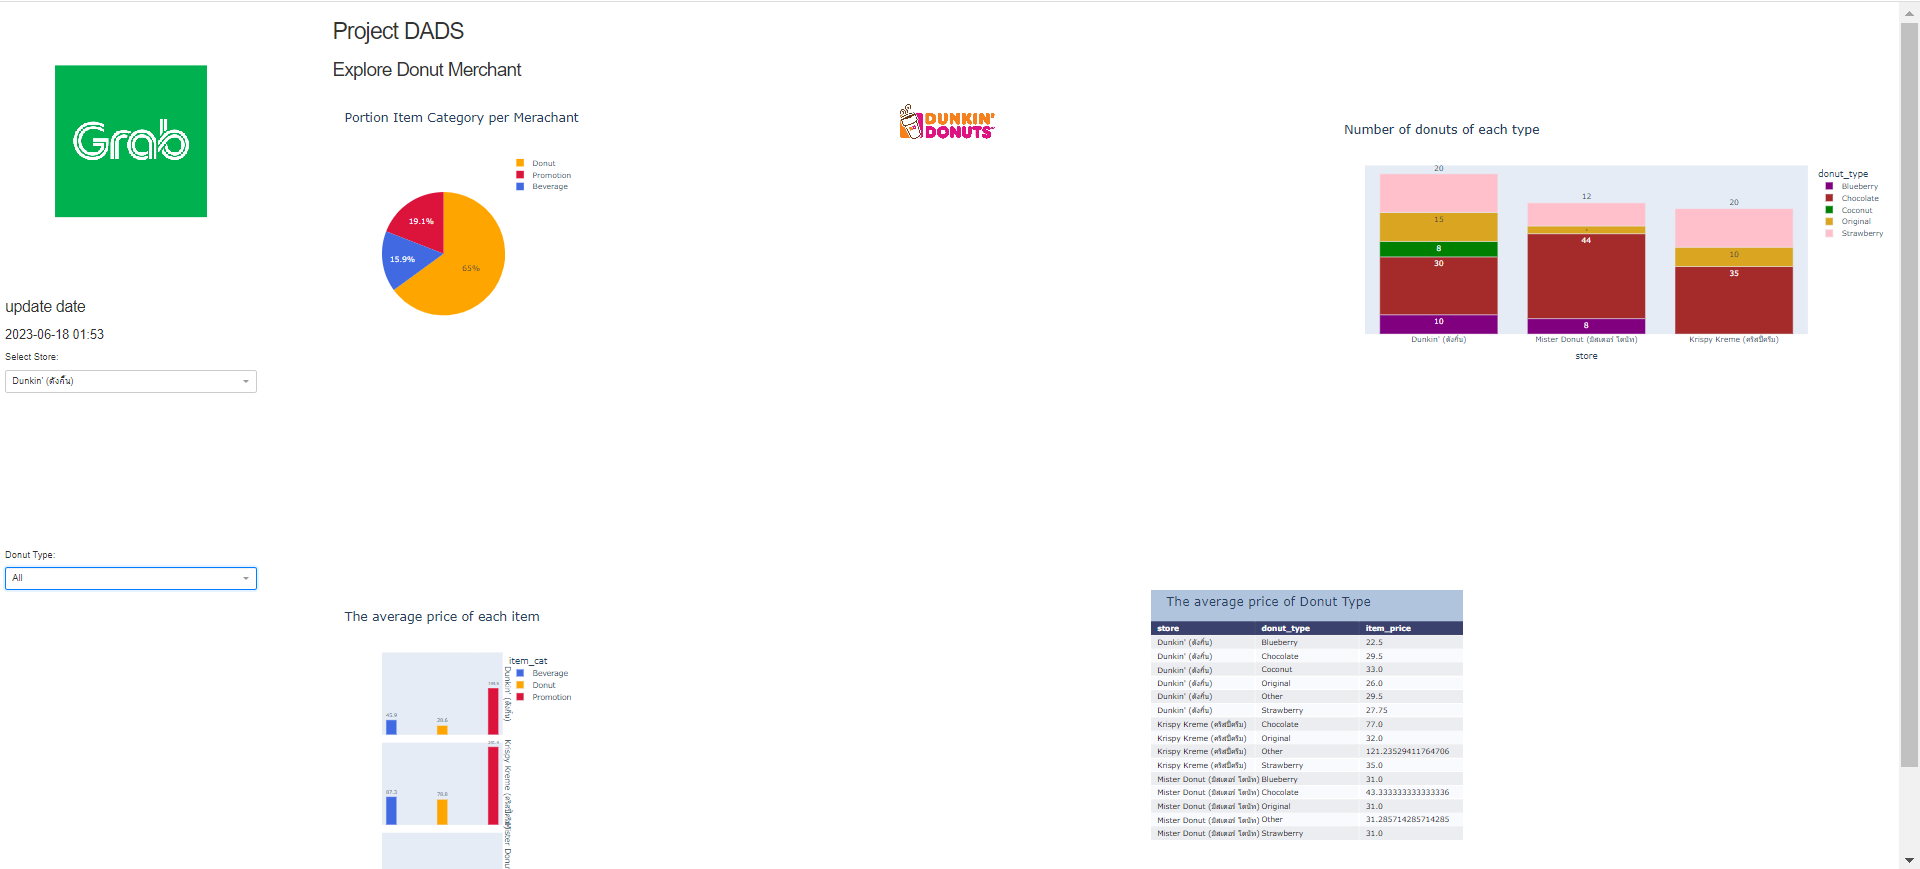